# Análisis exploratorio de los datos  (EDA)

## 1. Importar librerías  
A continuación se importan las liberías necesarias para llevar a cabo el EDA:

In [1]:
# numpy y pandas para manejo de los datos
import numpy as np
import pandas as pd 

# File system manangement
import os

# suprimir warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib y seaborn para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importar datos
Se importan los datos y se añaden nombres de las columnas. Además se transforma la variable 'Gender' a valores de 0 y 1. 

In [2]:
path ='LiverPatient.csv'

all_data =pd.read_csv(path, header =0)
# Nombres de columnas 
all_data.columns= ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG', 'Status']

# Transformar Gender  
all_data['Gender'].replace('Female',0 ,inplace=True)
all_data['Gender'].replace('Male',1,inplace=True)
all_data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Status
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [3]:
# Dimensión del dataset
rows,variables = all_data.shape
print(f'El dataframe contiene {rows} registros y {variables} variables')

El dataframe contiene 582 registros y 11 variables


## 2. Preprocesamiento



In [4]:
lista_datos = [all_data]
# missing values totales
for i in lista_datos:
    print(i.isnull().sum().sort_values(ascending=False))
# quitar missing values
all_data = all_data.dropna()

rows,variables = all_data.shape

print(f'Dataframe without NaNs contains {rows} records and {variables} variables')

AG         4
Age        0
Gender     0
TB         0
DB         0
Alkphos    0
Sgpt       0
Sgot       0
TP         0
ALB        0
Status     0
dtype: int64
Dataframe without NaNs contains 578 records and 11 variables


Como solamente aparecen valores faltantes en una variable y suponen una proporción muy pequeña del total, se han eliminado las filas que los contienen.

## 3. Estadística descriptiva

Se realiza un resumen estadístico del dataset. 

In [5]:
# dataframe resumen
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 581
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      578 non-null    int64  
 1   Gender   578 non-null    int64  
 2   TB       578 non-null    float64
 3   DB       578 non-null    float64
 4   Alkphos  578 non-null    int64  
 5   Sgpt     578 non-null    int64  
 6   Sgot     578 non-null    int64  
 7   TP       578 non-null    float64
 8   ALB      578 non-null    float64
 9   AG       578 non-null    float64
 10  Status   578 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 54.2 KB


In [6]:
# resumen estadistico
all_data.describe()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Status
count,578.000000,578.000000,578.000000,578.00000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,44.747405,0.759516,3.319896,1.49654,291.546713,81.238754,110.574394,6.481142,3.138235,0.947145,1.285467
std,16.213968,0.427748,6.232158,2.81834,243.734041,183.321431,290.075539,1.085500,0.795094,0.319863,0.452028
min,4.000000,0.000000,0.400000,0.10000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.20000,175.250000,23.250000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.30000,208.500000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,58.000000,1.000000,2.600000,1.30000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.70000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## 3. Analisis univariante


Se realiza una análisis de las variables de manera individual para tener una mejor comprensión del dataset. 

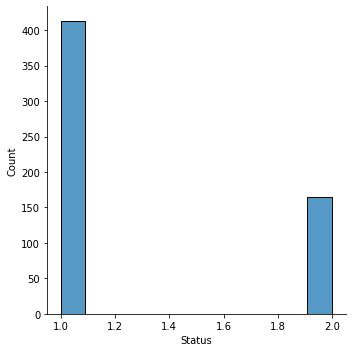

In [7]:
# Variable respuesta  
sns.displot(all_data, x="Status")

Con este gráfico observamos que los datos están muy desbalanceados. Será necesario evaluar medidas que corrijan esta situación.

<AxesSubplot:xlabel='AG', ylabel='Density'>

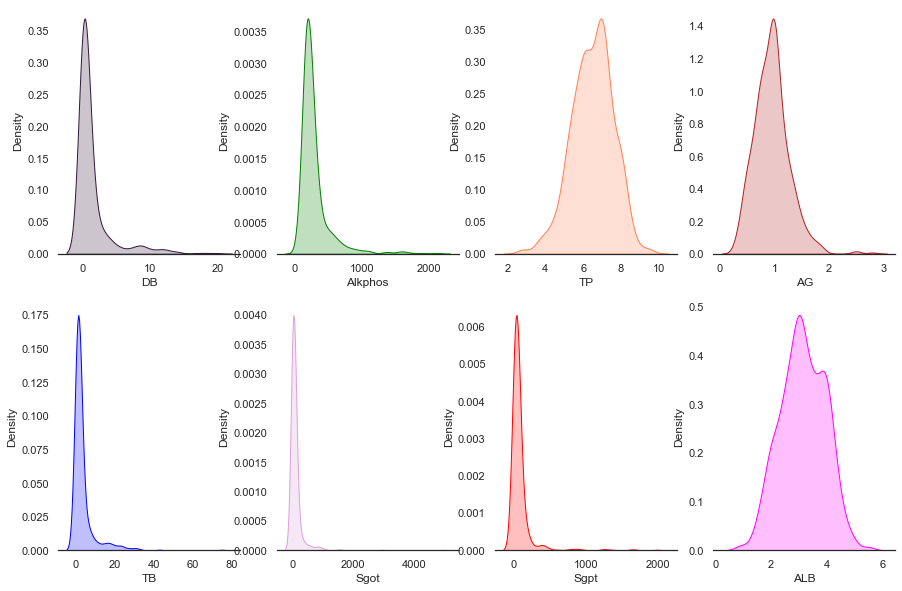

In [8]:
sns.set(style="white", palette="rocket", color_codes=True)
f, axes = plt.subplots(2, 4, figsize=(15, 10))
sns.despine(left=True)
sns.distplot(all_data['DB'], hist=False,  kde_kws={"shade": True}, ax=axes[0, 0])
sns.distplot(all_data['TB'], hist=False, color="b", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(all_data['Alkphos'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[0, 1])
sns.distplot(all_data['Sgpt'], hist=False, color="r", kde_kws={"shade": True}, ax=axes[1, 2])
sns.distplot(all_data['Sgot'], hist=False, color="plum", kde_kws={"shade": True}, ax=axes[1, 1])
sns.distplot(all_data['TP'], hist=False, color="coral", kde_kws={"shade": True}, ax=axes[0, 2])
sns.distplot(all_data['ALB'], hist=False, color="magenta", kde_kws={"shade": True}, ax=axes[1, 3])
sns.distplot(all_data['AG'], hist=False, color="firebrick", kde_kws={"shade": True}, ax=axes[0, 3])




Teniendo en cuenta los histogramas, algunas variables no se distribuyen normalmente, por lo que será necesario estudiar estrategias de transformación de los datos. 

### 3.1. Detección de outliers

Se realizan diagramas de cajas para identificar outliers, se muestras a continuación variables en las que se identificaron este tipo de puntos: 

<AxesSubplot:xlabel='TB'>

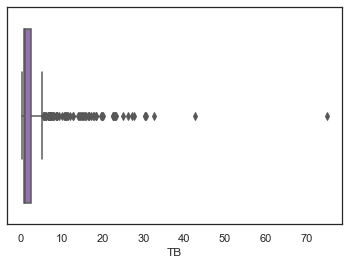

In [9]:
# TB
sns.boxplot(all_data['TB'], color='tab:purple')

<AxesSubplot:xlabel='DB'>

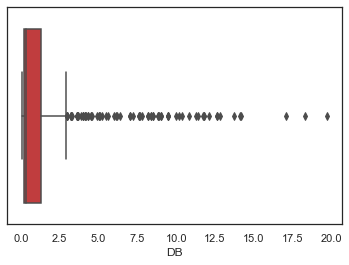

In [10]:
# DB
sns.boxplot(all_data['DB'], color='tab:red')

<AxesSubplot:xlabel='Alkphos'>

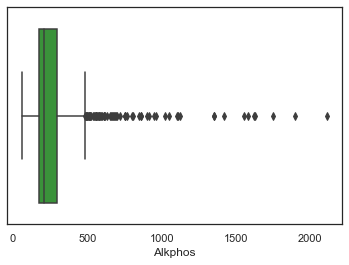

In [11]:
# Alkphos
sns.boxplot(all_data['Alkphos'], color='tab:green')

<AxesSubplot:xlabel='Sgpt'>

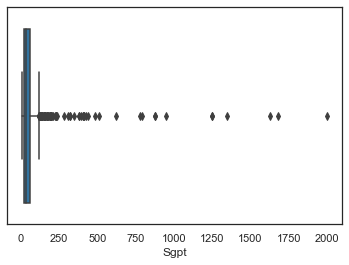

In [12]:
# Sgpt
sns.boxplot(all_data['Sgpt'], color='tab:blue')

<AxesSubplot:xlabel='Sgot'>

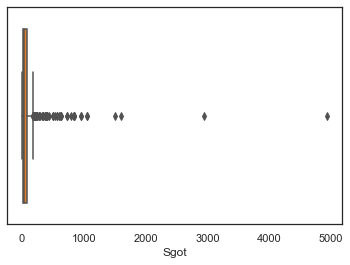

In [13]:
# Sgot
sns.boxplot(all_data['Sgot'], color='tab:orange')

<AxesSubplot:xlabel='TP'>

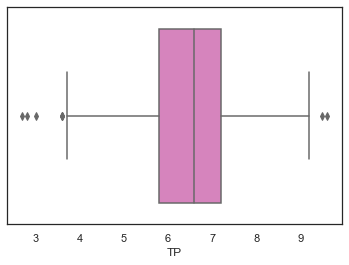

In [14]:
# TP
sns.boxplot(all_data['TP'], color='tab:pink')

<AxesSubplot:xlabel='AG'>

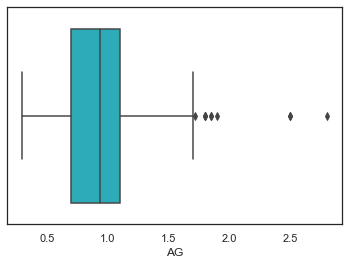

In [15]:
# AG
sns.boxplot(all_data['AG'], color='tab:cyan')

De la misma manera que los histogramas, estos boxplots confirman la no normalidad de algunas de las variables y la necesidad transformar los datos. 

## 4. Análisis multivariante
En esta sección se evaluará la relación entre las variables para identificar posibles correlaciones. 


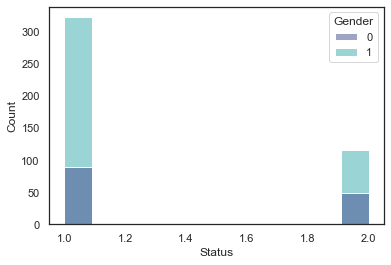

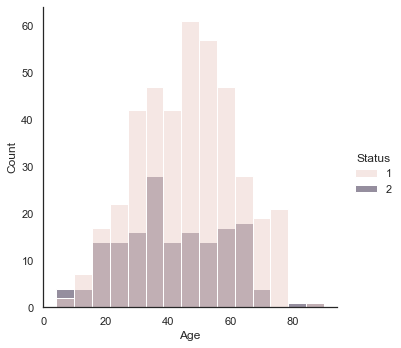

In [16]:
# Histograma Status vs Gender Variables
sns.histplot(all_data, x="Status", hue='Gender', palette='mako')
# Distribución variable Age  
sns.displot(all_data, x="Age", hue="Status")

Por su naturaleza, algunas variables respuesta podrían estar teoréticamente correlacionadas. A continuación se evalúan estas potenciales relaciones: 

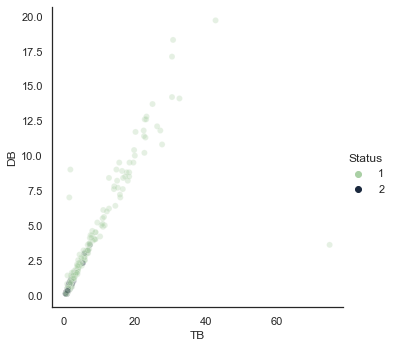

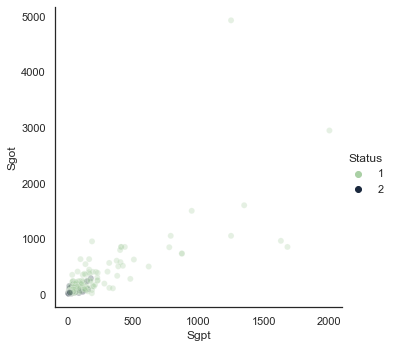

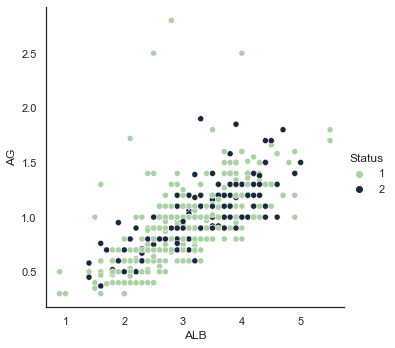

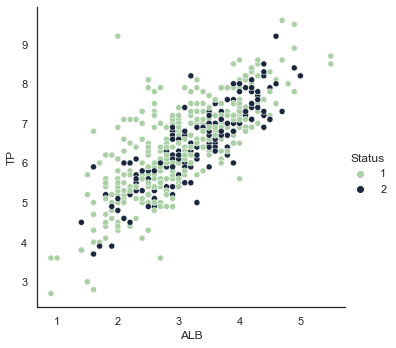

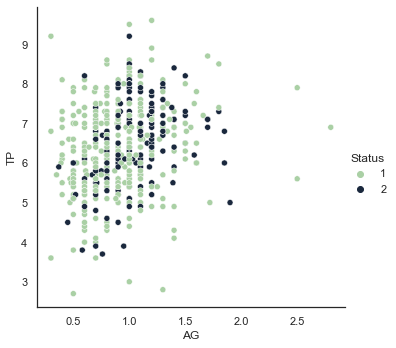

In [17]:
# Correlacion entre TB y DB
sns.relplot(x="TB", y="DB", palette="ch:r=-.5,l=.75", data=all_data, hue='Status', alpha= 0.3)
# Correlacion entre Sgpt y Sgot
sns.relplot(x="Sgpt", y="Sgot", palette="ch:r=-.5,l=.75", data=all_data, hue='Status', alpha= 0.3)
# Correlacion entre ALB y AG
sns.relplot(x="ALB", y="AG", palette="ch:r=-.5,l=.75", data=all_data, hue='Status')
# Correlacion entre ALB y TP
sns.relplot(x="ALB", y="TP", palette="ch:r=-.5,l=.75", data=all_data, hue='Status')
# Correlacion entre AG y TP
sns.relplot(x="AG", y="TP", palette="ch:r=-.5,l=.75", data=all_data, hue='Status')

### 4.1. Estimación de densidad por Kernel (KDE)


En estadística, KDE es un método no paramétrico que permite estimar la función de densidad de probabilidad de una variable. Es un método de suaviazado de los datos para realizar inferencias en conjuntos de datos finitos. 



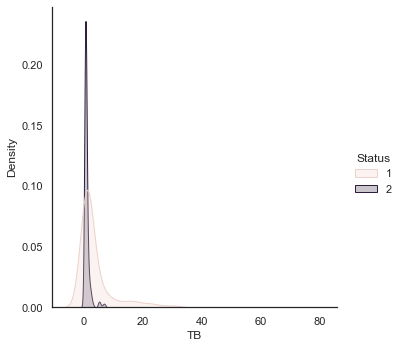

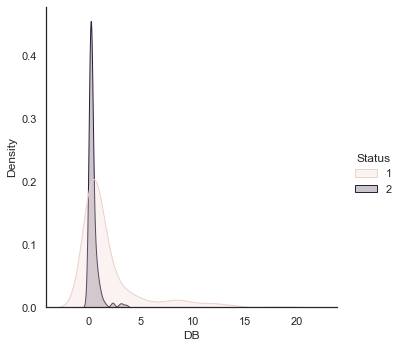

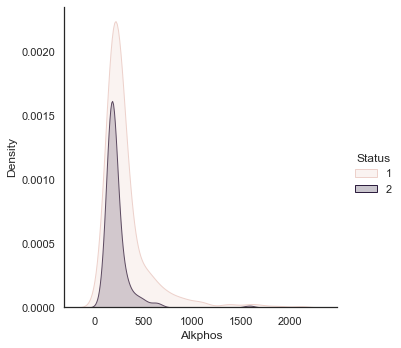

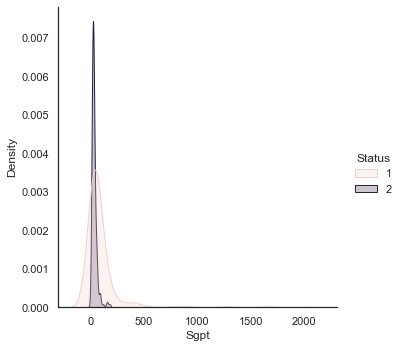

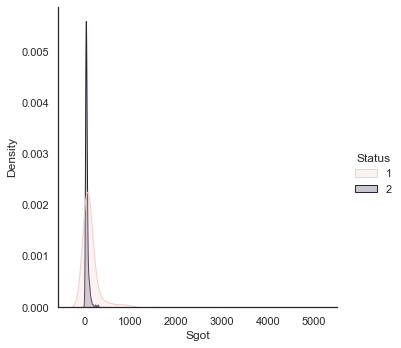

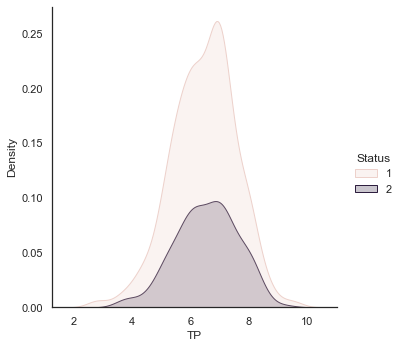

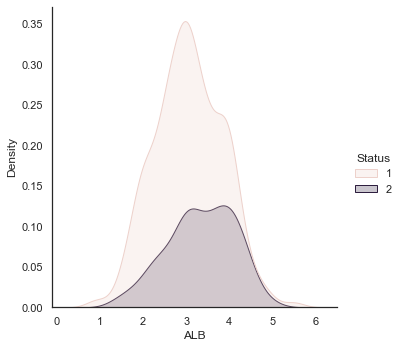

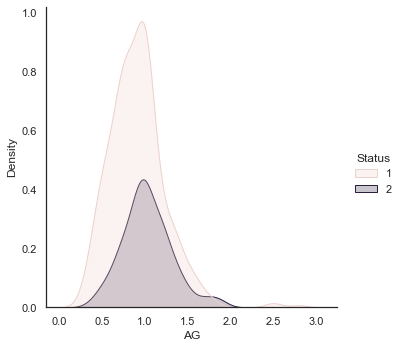

In [18]:
# Total bilirrubin
sns.displot(all_data, x="TB", hue="Status", kind="kde", fill=True)
# Direct bilirrubin
sns.displot(all_data, x="DB", hue="Status", kind="kde", fill=True)
# Alkaline Phosphatase
sns.displot(all_data, x="Alkphos", hue="Status", kind="kde", fill=True)
# Alanine transaminase
sns.displot(all_data, x='Sgpt', hue='Status', kind='kde', fill=True)
# Aspartate transaminase
sns.displot(all_data, x='Sgot', hue='Status', kind='kde', fill=True)
# Total protein
sns.displot(all_data, x='TP', hue='Status', kind='kde', fill=True)
# Albumin
sns.displot(all_data, x='ALB', hue='Status', kind='kde', fill=True)
# Albumin globulin ratio
sns.displot(all_data, x='AG', hue='Status', kind='kde', fill=True)

#### 4.1. Plot de multiples distribuciones

En lugar de visualizar variables dos a dos, este tipo de plot muestra en una sola visualización todas las variables y sus relaciones entre ellas. 

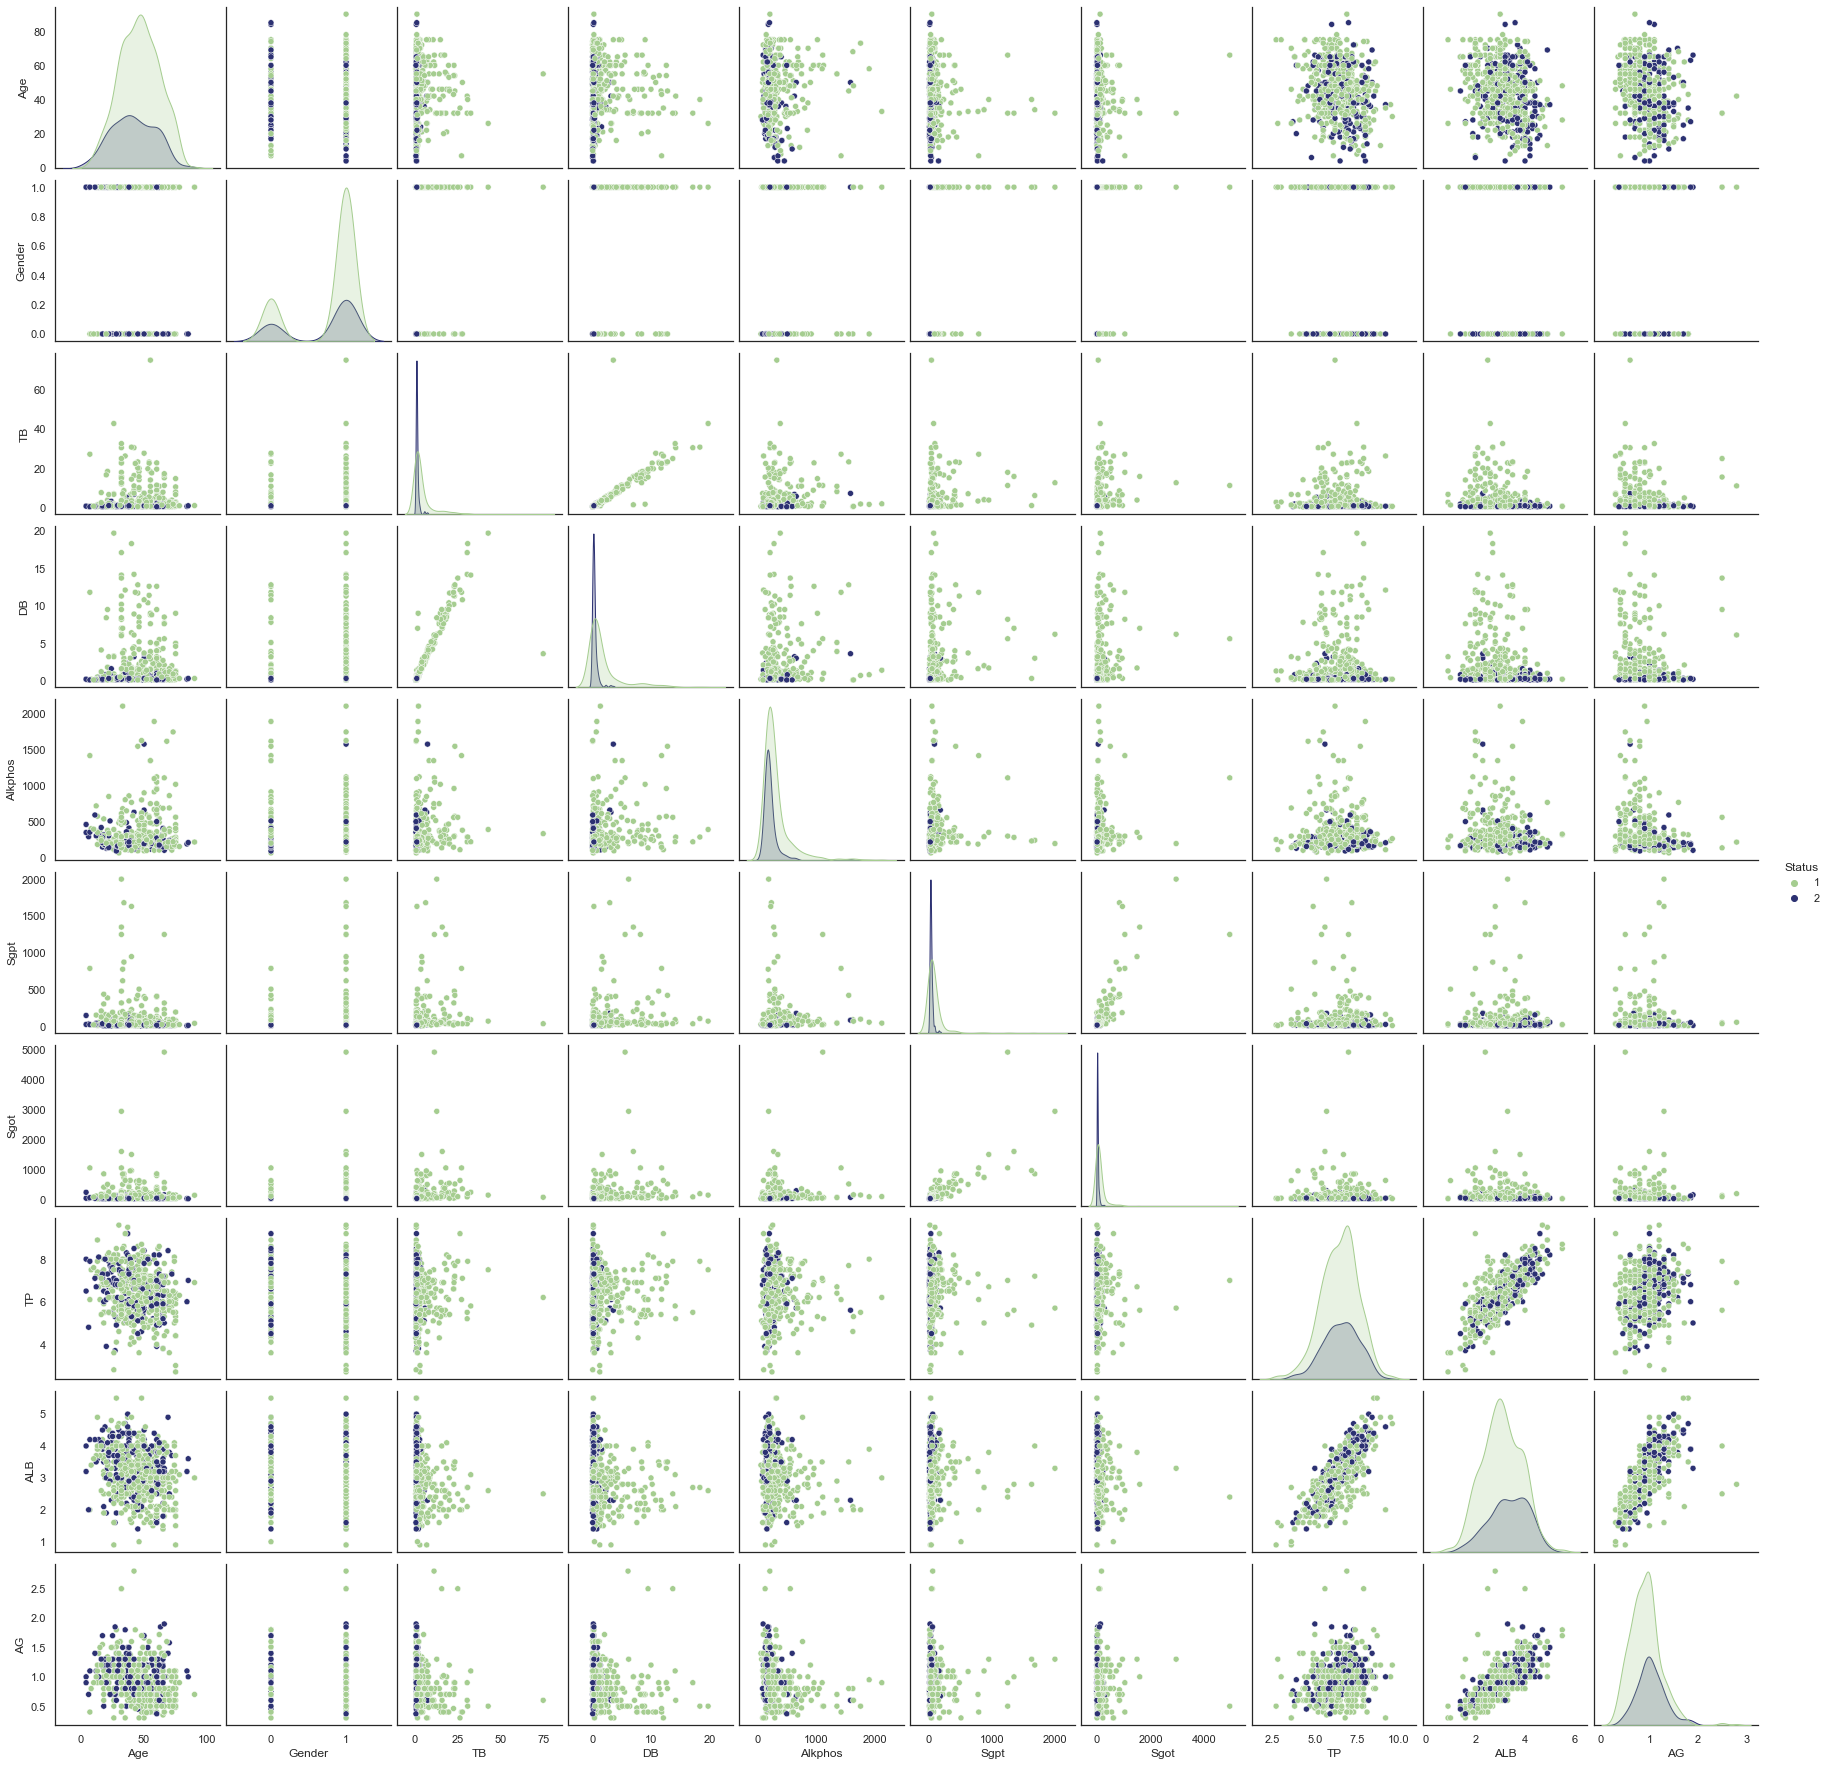

In [19]:
sns.pairplot(all_data, palette='crest', hue='Status')

#### 4.2. Correlaciones

Es importante analizar la potencial multicolinealidad entre variables. La relación entre las variables del dataset se puede ver facilmente a través de una matriz de correlación. La multicolinealidad puede afectar negativamente a la interpretación del predictor utilizado para construir el modelo. 
El coeficiente de correlación de Pearson (r) mide la correlación lineal entre dos variables. Va entre -1 y 1 siendo 0 el caso en el que las variables no están correlacionadas. 




In [20]:
cor_with_tar= all_data[:].corr()
print("The most relevant features (numeric) for the target are :")
cor_with_tar

The most relevant features (numeric) for the target are :


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Status
Age,1.000000,0.059946,0.011925,0.007866,0.079924,-0.087158,-0.019839,-0.187148,-0.265016,-0.216386,-0.132024
Gender,0.059946,1.000000,0.087030,0.097929,-0.030770,0.080476,0.078664,-0.094513,-0.095218,-0.003886,-0.083539
TB,0.011925,0.087030,1.000000,0.874440,0.205491,0.213173,0.237148,-0.007694,-0.221980,-0.206410,-0.220787
DB,0.007866,0.097929,0.874440,1.000000,0.233727,0.232950,0.256826,0.000285,-0.228291,-0.200297,-0.246952
Alkphos,0.079924,-0.030770,0.205491,0.233727,1.000000,0.124546,0.166384,-0.026850,-0.163300,-0.234318,-0.183924
Sgpt,-0.087158,0.080476,0.213173,0.232950,0.124546,1.000000,0.791822,-0.042259,-0.028536,-0.002466,-0.163580
Sgot,-0.019839,0.078664,0.237148,0.256826,0.166384,0.791822,1.000000,-0.025593,-0.084813,-0.070129,-0.152249
TP,-0.187148,-0.094513,-0.007694,0.000285,-0.026850,-0.042259,-0.025593,1.000000,0.783095,0.234984,0.033949
ALB,-0.265016,-0.095218,-0.221980,-0.228291,-0.163300,-0.028536,-0.084813,0.783095,1.000000,0.689722,0.160053
AG,-0.216386,-0.003886,-0.206410,-0.200297,-0.234318,-0.002466,-0.070129,0.234984,0.689722,1.000000,0.163030


<AxesSubplot:>

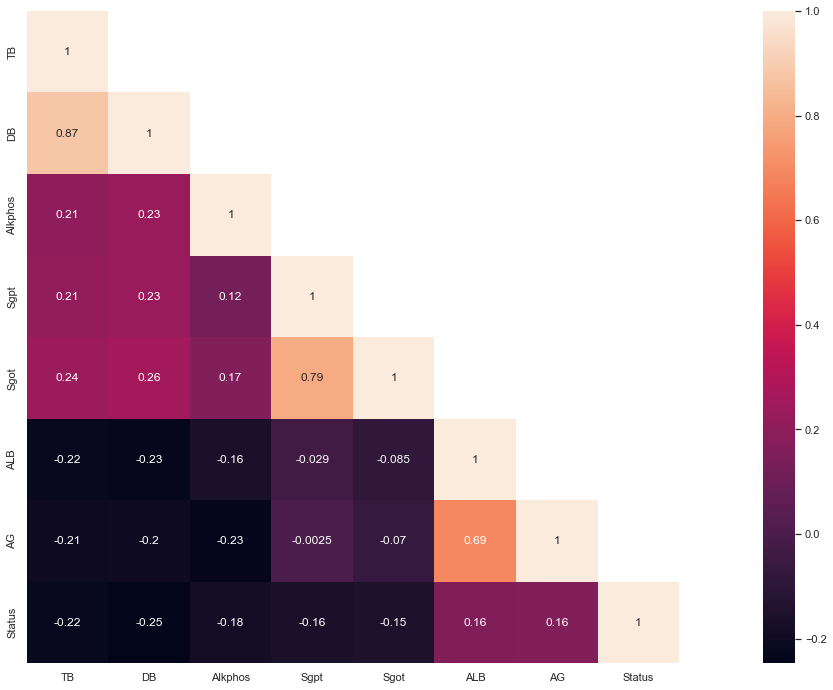

In [29]:
threshold_corr = 0.15
higher_corr = [k for k in cor_with_tar['Status'].keys() 
               if abs(cor_with_tar['Status'][k]) >= threshold_corr]
cor_mat= all_data[higher_corr].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

